In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/leafmonk/Documents/Cash Crop POC/images'

In [3]:
base_dir = '/home/leafmonk/Documents/Cash Crop POC/POC'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_hydrangea_dir = os.path.join(train_dir, 'hydrangea')
os.mkdir(train_hydrangea_dir)

In [6]:
train_elephant_dir = os.path.join(train_dir, 'elephant')
os.mkdir(train_elephant_dir)

In [7]:
validation_hydrangea_dir = os.path.join(validation_dir, 'hydrangea')
os.mkdir(validation_hydrangea_dir)

In [8]:
validation_elephant_dir = os.path.join(validation_dir, 'elephant')
os.mkdir(validation_elephant_dir)

In [9]:
test_hydrangea_dir = os.path.join(test_dir, 'hydrangea')
os.mkdir(test_hydrangea_dir)

In [10]:
test_elephant_dir = os.path.join(test_dir, 'elephant')
os.mkdir(test_elephant_dir)

In [11]:
path, dirs, files = next(os.walk("/home/leafmonk/Documents/Cash Crop POC/images/Hydrangea"))
file_count = len(files)
print(file_count)

2246


In [12]:
inames = ['Hydrangeaimage-{}.jpg'.format(i) for i in range(int(.6 * file_count))]
fnames = ['hydrangea.{}.jpg'.format(i) for i in range(int(.6 * file_count))]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Hydrangea',inames[i])
    dst = os.path.join(train_hydrangea_dir, fnames[i])
    shutil.copyfile(src, dst)

In [13]:
inames = ['Hydrangeaimage-{}.jpg'.format(i) for i in range(int(.6 * file_count),int(.8 * file_count))]
fnames = ['hydrangea.{}.jpg'.format(i) for i in range(int(.6 * file_count),int(.8 * file_count))]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Hydrangea',inames[i])
    dst = os.path.join(validation_hydrangea_dir, fnames[i])
    shutil.copyfile(src, dst)

In [14]:
inames = ['Hydrangeaimage-{}.jpg'.format(i) for i in range(int(.8 * file_count),file_count)]
fnames = ['hydrangea.{}.jpg'.format(i) for i in range(int(.8 * file_count),file_count)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Hydrangea',inames[i])
    dst = os.path.join(test_hydrangea_dir, fnames[i])
    shutil.copyfile(src, dst)

In [15]:
path, dirs, files = next(os.walk("/home/leafmonk/Documents/Cash Crop POC/images/Elephant Ear"))
file_count = len(files)
print(file_count)

1664


In [16]:
inames = ['Elephant Earimage-{}.jpg'.format(i) for i in range(int(.6 * file_count))]
fnames = ['elephant.{}.jpg'.format(i) for i in range(int(.6 * file_count))]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Elephant Ear',inames[i])
    dst = os.path.join(train_elephant_dir, fnames[i])
    shutil.copyfile(src, dst)

In [17]:
inames = ['Elephant Earimage-{}.jpg'.format(i) for i in range(int(.6 * file_count),int(.8 * file_count))]
fnames = ['elephant.{}.jpg'.format(i) for i in range(int(.6 * file_count),int(.8 * file_count))]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Elephant Ear',inames[i])
    dst = os.path.join(validation_elephant_dir, fnames[i])
    shutil.copyfile(src, dst)

In [18]:
inames = ['Elephant Earimage-{}.jpg'.format(i) for i in range(int(.8 * file_count),file_count)]
fnames = ['elephant.{}.jpg'.format(i) for i in range(int(.8 * file_count),file_count)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Elephant Ear',inames[i])
    dst = os.path.join(test_elephant_dir, fnames[i])
    shutil.copyfile(src, dst)

In [19]:
print('total training hydrangea images:', len(os.listdir(train_hydrangea_dir)))
print('total validation hydrangea images:', len(os.listdir(validation_hydrangea_dir)))
print('total test hydrangea images:', len(os.listdir(test_hydrangea_dir)))
print('total training elephant images:', len(os.listdir(train_elephant_dir)))
print('total validation elephant images:', len(os.listdir(validation_elephant_dir)))
print('total test elephant images:', len(os.listdir(test_elephant_dir)))

total training hydrangea images: 1347
total validation hydrangea images: 449
total test hydrangea images: 450
total training elephant images: 998
total validation elephant images: 333
total test elephant images: 333


In [20]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [21]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=18,
        class_mode='binary')

Found 2345 images belonging to 2 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=18,
        class_mode='binary')

Found 782 images belonging to 2 classes.


In [27]:
history = model.fit(
        train_generator,
        steps_per_epoch=18,
        epochs=100,
        validation_data = validation_generator,
        validation_steps=18)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 18 steps
Epoch 1/235
18/18 [==============================] - 3s 154ms/step - loss: 0.6944 - acc: 0.5525 - val_loss: 0.6590 - val_acc: 0.5741
Epoch 2/235
18/18 [==============================] - 2s 135ms/step - loss: 0.6904 - acc: 0.5000 - val_loss: 0.6701 - val_acc: 0.6451
Epoch 3/235
18/18 [==============================] - 2s 132ms/step - loss: 0.6618 - acc: 0.6019 - val_loss: 0.6341 - val_acc: 0.6914
Epoch 4/235
18/18 [==============================] - 2s 129ms/step - loss: 0.6455 - acc: 0.6512 - val_loss: 0.6210 - val_acc: 0.6852
Epoch 5/235
18/18 [==============================] - 2s 136ms/step - loss: 0.6269 - acc: 0.6327 - val_loss: 0.6421 - val_acc: 0.6204
Epoch 6/235
18/18 [==============================] - 2s 133ms/step - loss: 0.6203 - acc: 0.6605 - val_loss: 0.6239 - val_acc: 0.6204
Epoch 7/235
18/18 [==============================] - 2s 126ms/step - loss: 0.5918 - acc: 0.6883 - val_loss: 0.

18/18 [==============================] - 2s 132ms/step - loss: 0.5363 - acc: 0.7377 - val_loss: 0.4888 - val_acc: 0.7623
Epoch 122/235
18/18 [==============================] - 2s 134ms/step - loss: 0.4796 - acc: 0.7593 - val_loss: 0.5575 - val_acc: 0.7160
Epoch 123/235
18/18 [==============================] - 2s 130ms/step - loss: 0.4605 - acc: 0.7500 - val_loss: 0.4436 - val_acc: 0.7840
Epoch 124/235
18/18 [==============================] - 2s 129ms/step - loss: 0.4935 - acc: 0.7191 - val_loss: 0.4868 - val_acc: 0.7623
Epoch 125/235
18/18 [==============================] - 2s 131ms/step - loss: 0.4839 - acc: 0.7500 - val_loss: 0.4454 - val_acc: 0.7685
Epoch 126/235
18/18 [==============================] - 2s 129ms/step - loss: 0.4815 - acc: 0.7685 - val_loss: 0.6328 - val_acc: 0.7099
Epoch 127/235
18/18 [==============================] - 2s 131ms/step - loss: 0.4521 - acc: 0.7870 - val_loss: 0.4804 - val_acc: 0.7747
Epoch 128/235
18/18 [==============================] - 2s 131ms/step 

Epoch 182/235
18/18 [==============================] - 3s 139ms/step - loss: 0.4633 - acc: 0.7840 - val_loss: 0.4196 - val_acc: 0.8056
Epoch 183/235
18/18 [==============================] - 2s 138ms/step - loss: 0.4352 - acc: 0.7840 - val_loss: 0.4706 - val_acc: 0.7994
Epoch 184/235
18/18 [==============================] - 2s 131ms/step - loss: 0.4551 - acc: 0.7901 - val_loss: 0.5702 - val_acc: 0.7284
Epoch 185/235
18/18 [==============================] - 2s 131ms/step - loss: 0.3497 - acc: 0.8426 - val_loss: 0.4842 - val_acc: 0.7778
Epoch 186/235
18/18 [==============================] - 2s 128ms/step - loss: 0.4387 - acc: 0.7747 - val_loss: 0.5513 - val_acc: 0.7623
Epoch 187/235
18/18 [==============================] - 2s 130ms/step - loss: 0.4397 - acc: 0.7593 - val_loss: 0.5196 - val_acc: 0.7685
Epoch 188/235
18/18 [==============================] - 2s 132ms/step - loss: 0.3940 - acc: 0.7932 - val_loss: 0.4483 - val_acc: 0.7840
Epoch 189/235
18/18 [==============================] - 

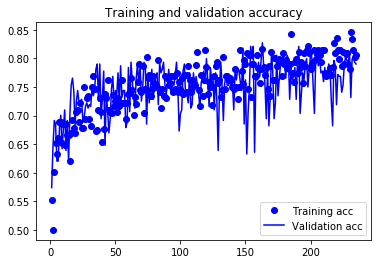

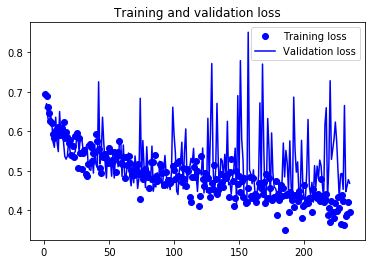

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

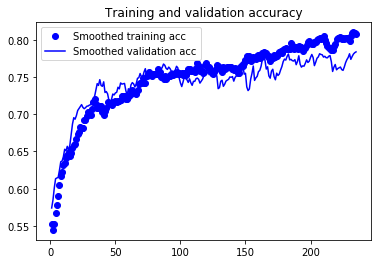

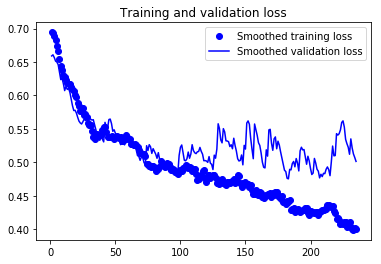

In [29]:
def smooth_curve(points, factor=0.85):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
        smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=18,
        class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=18)
print('test acc:', test_acc)

Found 783 images belonging to 2 classes.
  ...
    to  
  ['...']
18/18 [==============================] - 1s 35ms/step - loss: 0.4958 - acc: 0.8056
test acc: 0.8055556


In [31]:
model.save('cash_crop_4C_2D_4.h5')